# Pollutant Emissions from Transport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
data_df = pd.read_csv('Dataset/t2020_rk300.tsv', sep='\t', header=0)

split_col = data_df[r'unit,src_nfr,airpol,geo\time'].str.split(',', expand=True)
new_cols = ['unit', 'src_nfr', 'airpol', 'geo']
for i in range(0, 4):
    data_df.insert(i, new_cols[i], split_col[i])
    
data_df.drop(columns=[r'unit,src_nfr,airpol,geo\time'], axis=1, inplace=True)

data_df.head()

,unit,src_nfr,airpol,geo,1990,1991,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,PC,SE1_RD_NRD,NMVOC,AT,317.9,303.2,261.4,225.7,198.3,174.4,...,55.1,50.3,48.0,44.2,41.2,39.0,36.8,35.7,33.5,32.2
1,PC,SE1_RD_NRD,NMVOC,BE,252.7,230.9,221.9,204.0,191.8,182.9,...,42.3,38.5,35.5,32.0,28.5,24.8,24.3,24.1,23.6,22.6
2,PC,SE1_RD_NRD,NMVOC,BG,214.8,107.1,129.7,146.9,142.5,150.4,...,56.6,55.4,49.0,46.6,46.1,40.6,40.9,41.6,38.0,32.8
3,PC,SE1_RD_NRD,NMVOC,CY,134.7,132.0,129.3,124.4,126.7,123.8,...,75.1,68.6,65.2,60.7,56.1,51.7,50.0,48.5,49.6,48.2
4,PC,SE1_RD_NRD,NMVOC,CZ,116.3,108.8,132.1,120.8,131.0,128.5,...,60.6,59.8,53.0,49.6,44.1,37.6,34.1,29.8,26.3,26.1


In [3]:
data_df.columns = data_df.columns.str.replace(' ', '')

data_df.replace(to_replace=': ', value=np.nan, inplace=True)

cols = data_df.columns[4:]
data_df[cols] = data_df[cols].astype(float)

## Nitrogen Oxides

In [4]:
nox_df = data_df[data_df['airpol'] == 'NOX']

### Year and Country with Highest amount of Nitrogen Oxides

In [52]:
max_nox_year = nox_df.iloc[:, 4:].max(axis=0).idxmax(axis=1)
max_nox_country = data_df.iloc[nox_df.iloc[:, 4:].max(axis=1).idxmax(axis=0), 3]
print("In year {}, {} had highest amount of Nitrogen Oxides in air".format(max_nox_year, max_nox_country))

In year 1990, LT had highest amount of Nitrogen Oxides in air


### Hightest to Lowest amounts of Nitrogen Oxides in 2017

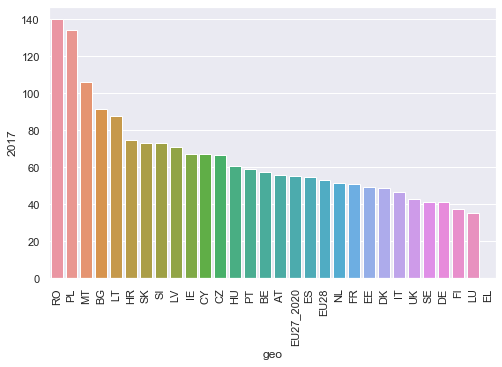

In [5]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.xticks(rotation=90)
sns.barplot(data=nox_df.sort_values(by='2017',ascending=False), x='geo', y='2017')

### Countries with Highest amount of Nitrogen Oxide in 2017

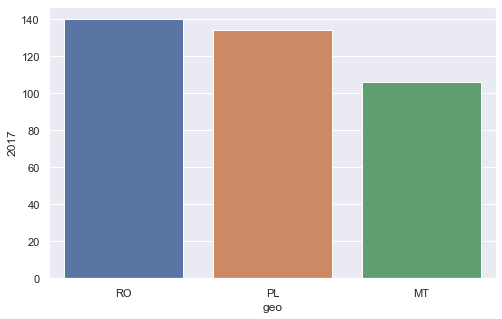

In [6]:
sns.barplot(data=nox_df.sort_values(by='2017',ascending=False).head(3), x='geo', y='2017')

In [8]:
nox_df.sort_values(by='2017',ascending=False).head(3)[['geo', '2017']]

,geo,2017
55,RO,140.0
53,PL,134.4
51,MT,106.4


### Countries with Lowest amount of Nitrogen Oxide in 2017

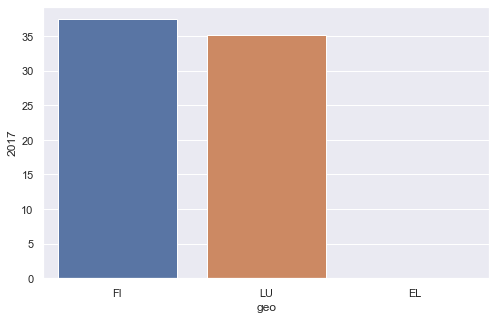

In [9]:
sns.barplot(data=nox_df.sort_values(by='2017',ascending=False).tail(3), x='geo', y='2017')

In [10]:
nox_df.sort_values(by='2017',ascending=False).tail(3)[['geo', '2017']]

,geo,2017
42,FI,37.4
49,LU,35.1
38,EL,NaN


### Analysis over time

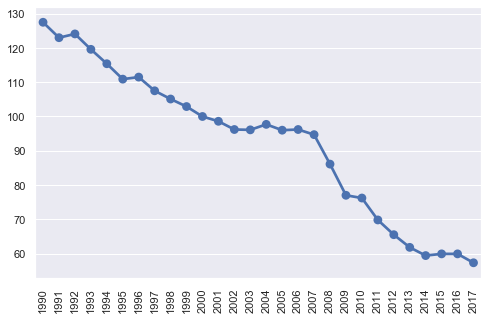

In [11]:
plt.xticks(rotation=90)
nox_amount = nox_df.median()
sns.pointplot(x=nox_amount.index, y=nox_amount)

### Non-Methane Volatile Organic Compounds

In [12]:
nmv_df = data_df[data_df['airpol'] == 'NMVOC']

In [54]:
max_nmv_year = nmv_df.iloc[:, 4:].max(axis=0).idxmax(axis=1)
max_nmv_country = data_df.iloc[nmv_df.iloc[:, 4:].max(axis=1).idxmax(axis=0), 3]
print("In year {}, {} had highest amount of Non-Methan Volatile Organic Compounds in air".format(max_nmv_year, max_nmv_country))

In year 1990, DE had highest amount of Non-Methan Volatile Organic Compounds in air


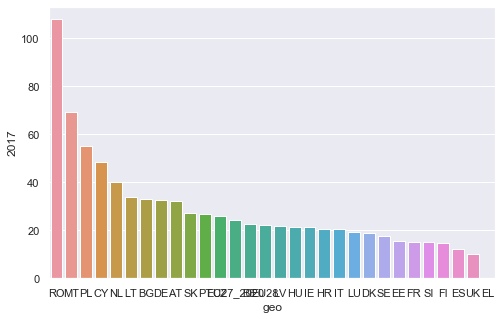

In [13]:
sns.barplot(data=nmv_df.sort_values(by='2017',ascending=False), x='geo', y='2017')

### Top 3 countries with Highest amount of Non-Methane Volatile Organic Compounds IN 2017

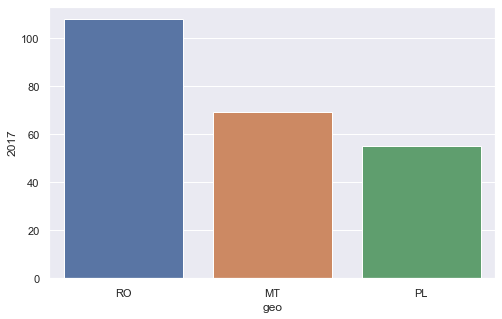

In [14]:
sns.barplot(data=nmv_df.sort_values(by='2017',ascending=False).head(3), x='geo', y='2017')

In [16]:
nmv_df.sort_values(by='2017',ascending=False).head(3)[['geo', '2017']]

,geo,2017
25,RO,107.7
21,MT,69.3
23,PL,55.0


### Countries with Lowest amount of Non-Methane Volatile Organic Compounds In 2017

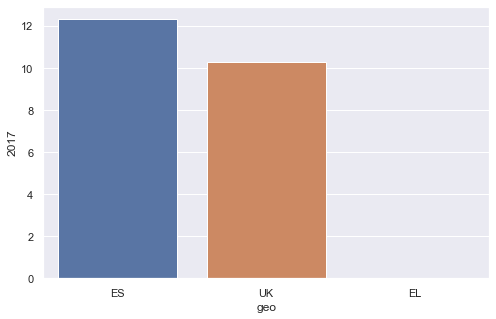

In [15]:
sns.barplot(data=nmv_df.sort_values(by='2017',ascending=False).tail(3), x='geo', y='2017')

In [17]:
nmv_df.sort_values(by='2017',ascending=False).tail(3)[['geo', '2017']]

,geo,2017
9,ES,12.3
29,UK,10.3
8,EL,NaN


### Particulates

In [18]:
pm10_df = data_df[data_df['airpol'] == 'PM10']

In [56]:
max_pm10_year = pm10_df.iloc[:, 4:].max(axis=0).idxmax(axis=1)
max_pm10_country = data_df.iloc[pm10_df.iloc[:, 4:].max(axis=1).idxmax(axis=0), 3]
print("In year {}, {} had highest amount of Particulates 10 in air".format(max_pm10_year, max_pm10_country))

In year 2017, RO had highest amount of Particulates 10 in air


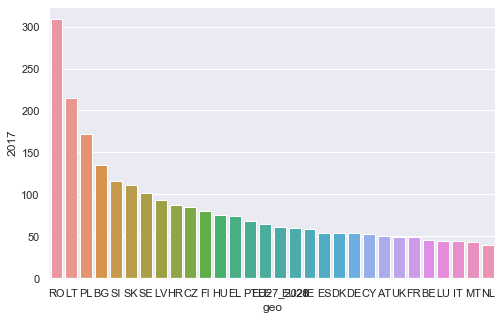

In [19]:
sns.barplot(data=pm10_df.sort_values(by='2017',ascending=False), x='geo', y='2017')

### Countries with Highest amount of Particulates In 2017

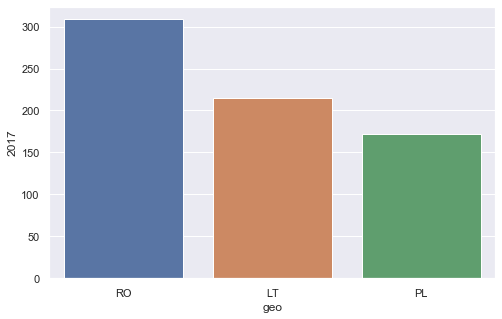

In [20]:
sns.barplot(data=pm10_df.sort_values(by='2017',ascending=False).head(3), x='geo', y='2017')

In [22]:
pm10_df.sort_values(by='2017',ascending=False).head(3)[['geo', '2017']]

,geo,2017
85,RO,308.5
78,LT,215.1
83,PL,172.0


### Countries with Highest amount of Particulates In 2017

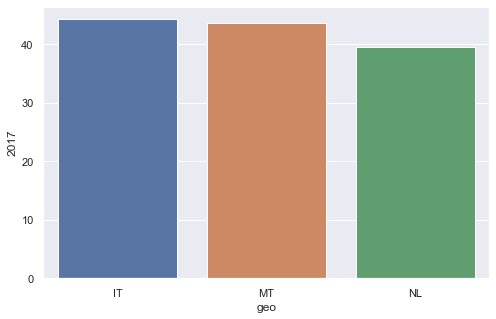

In [23]:
sns.barplot(data=pm10_df.sort_values(by='2017',ascending=False).tail(3), x='geo', y='2017')

In [24]:
pm10_df.sort_values(by='2017',ascending=False).tail(3)[['geo', '2017']]

,geo,2017
77,IT,44.2
81,MT,43.6
82,NL,39.5


## Reformating Dataframe

In [74]:
ref_data_df = data_df.melt(id_vars=['geo', 'airpol'],value_vars=data_df.columns[4:], var_name='year', value_name='pol_level')
ref_data_df

,geo,airpol,year,pol_level
0,AT,NMVOC,1990,317.9
1,BE,NMVOC,1990,252.7
2,BG,NMVOC,1990,214.8
3,CY,NMVOC,1990,134.7
4,CZ,NMVOC,1990,116.3
5,DE,NMVOC,1990,398.1
6,DK,NMVOC,1990,157.4
7,EE,NMVOC,1990,171.2
8,EL,NMVOC,1990,NaN
9,ES,NMVOC,1990,159.3


### Relationship between different pollutants and Analysis over time

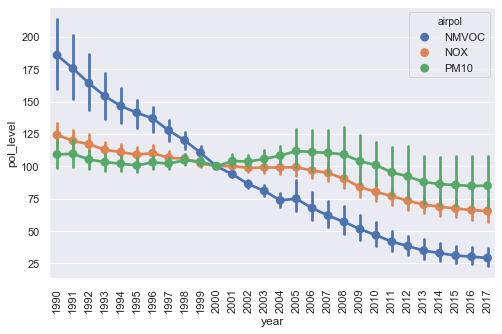

In [75]:
plt.xticks(rotation=90)
sns.pointplot(x='year', y='pol_level', hue='airpol', data=ref_data_df)

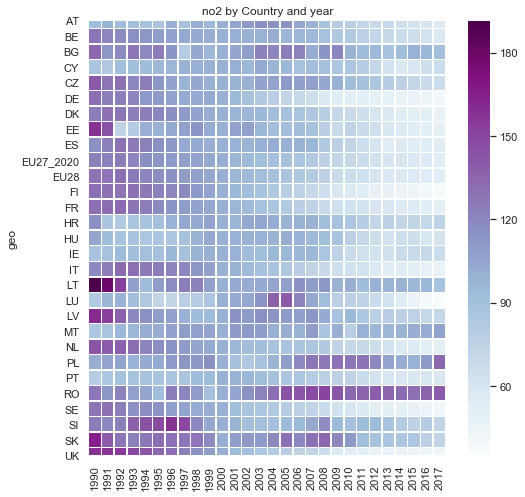

In [144]:
nox_data_df = nox_df.drop(columns=['unit', 'src_nfr', 'airpol'], axis=1)
nox_data_df = nox_data_df.dropna(how='any')
nox_data_df.set_index('geo', inplace=True)
nox_data_df
f, ax = plt.subplots(figsize=(8,8))
ax.set_title('{} by Country and year'.format('no2'))
sns.heatmap(nox_data_df, cmap="BuPu", linewidths=.5, ax=ax)

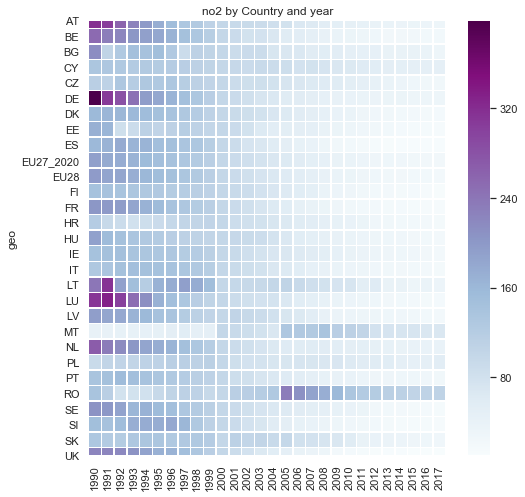

In [143]:
nmv_data_df = nmv_df.drop(columns=['unit', 'src_nfr', 'airpol'], axis=1)
nmv_data_df = nmv_data_df.dropna(how='any')
nmv_data_df.set_index('geo', inplace=True)
nmv_data_df
f, ax = plt.subplots(figsize=(8,8))
ax.set_title('{} by Country and year'.format('no2'))
sns.heatmap(nmv_data_df, cmap="BuPu", linewidths=.5, ax=ax)

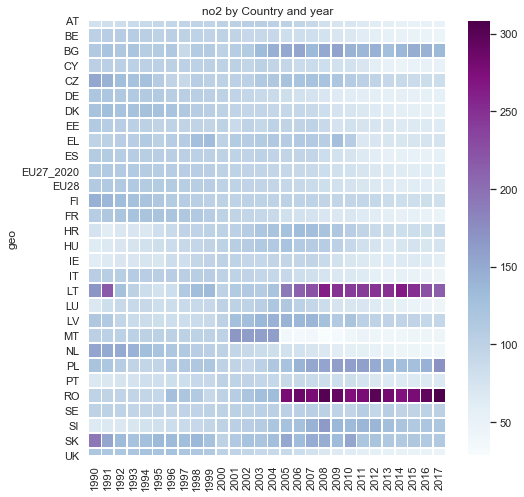

In [142]:
pm10_data_df = pm10_df.drop(columns=['unit', 'src_nfr', 'airpol'], axis=1)
pm10_data_df = pm10_data_df.dropna(how='any')
pm10_data_df.set_index('geo', inplace=True)
pm10_data_df
f, ax = plt.subplots(figsize=(8,8))
ax.set_title('{} by Country and year'.format('no2'))
sns.heatmap(pm10_data_df, cmap="BuPu", linewidths=.5, ax=ax)